Saving daily_42602_2018.csv to daily_42602_2018.csv
Saving daily_42602_2019.csv to daily_42602_2019.csv
Saving daily_42602_2020.csv to daily_42602_2020.csv
Saving daily_42602_2021.csv to daily_42602_2021.csv
Saving daily_42602_2022.csv to daily_42602_2022.csv
Saving daily_42602_2023.csv to daily_42602_2023.csv
Saving daily_42602_2024.csv to daily_42602_2024.csv
Files found: ['daily_42602_2023.csv', 'daily_42602_2021.csv', 'daily_42602_2018.csv', 'daily_42602_2024.csv', 'daily_42602_2019.csv', 'daily_42602_2020.csv', 'daily_42602_2022.csv']


/tmp/ipython-input-1150071646.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-1150071646.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-1150071646.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-1150071646.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-1150071646.py:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) f

Dataset shape: (1098133, 29)
Columns: ['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type', 'Observation Count', 'Observation Percent', 'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name', 'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name', 'Date of Last Change']
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1           73        23           42602    1  33.553056   
1           1           73        23           42602    1  33.553056   
2           1           73        23           42602    1  33.553056   
3           1           73        23           42602    1  33.553056   
4           1           73        23           42602    1  33.553056   

   Longitude  Datum          Parameter Name Sample Duration  ... AQI  \
0    -86

/tmp/ipython-input-1150071646.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = city_df.resample('M', on='Date Local')['NO2 Mean'].mean().reset_index()


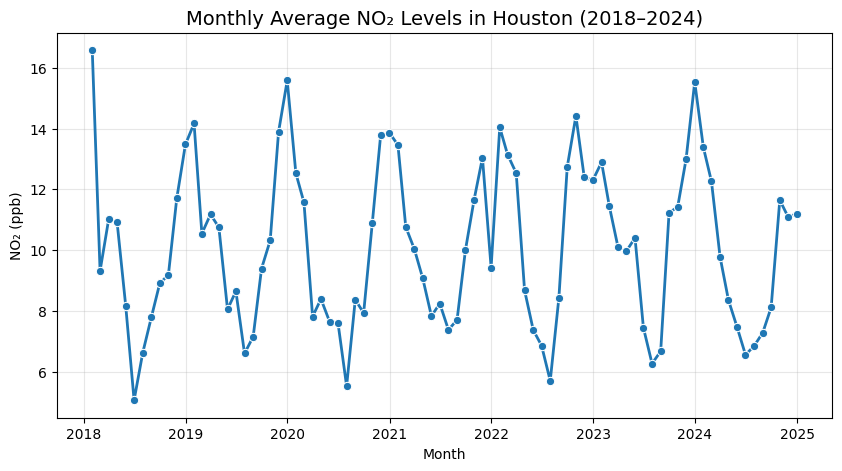

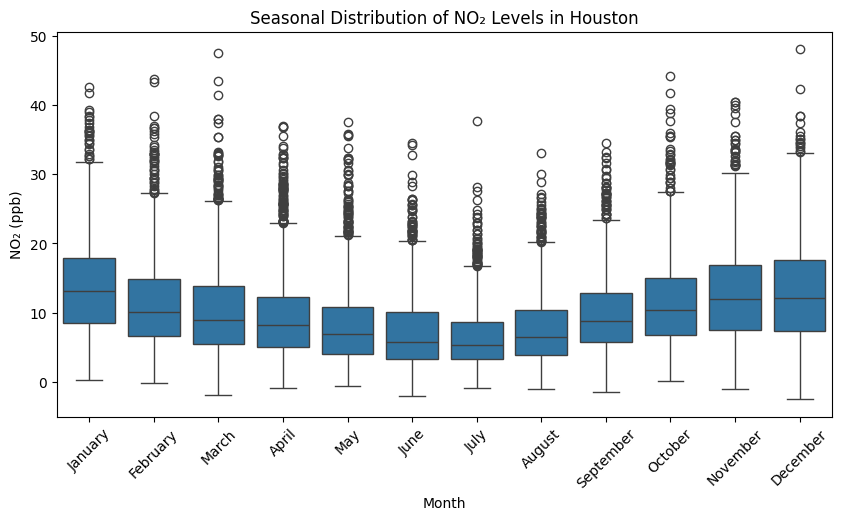

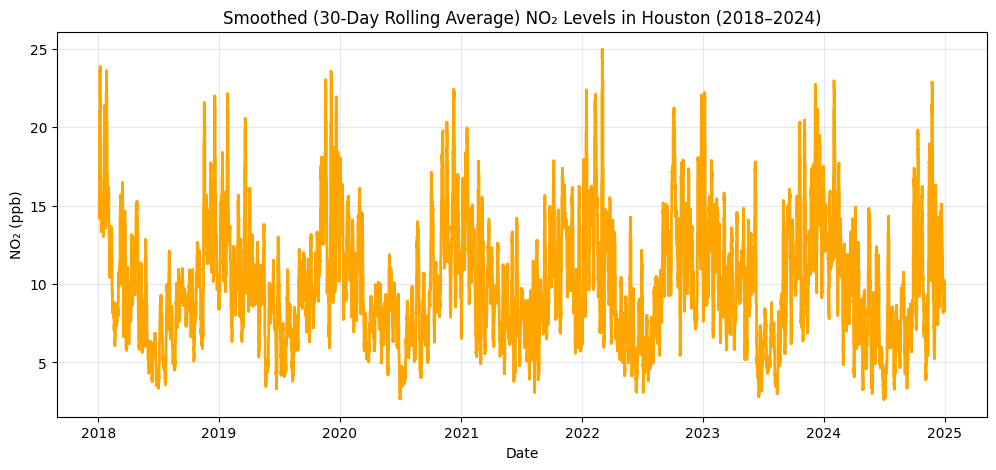


Weather data sample:
        time  Temp_Max  Temp_Min  Precipitation  WindSpeed
0 2018-01-01       3.4      -1.5            0.0       21.9
1 2018-01-02       0.9      -2.7            1.1       15.2
2 2018-01-03       6.5      -4.9            0.1       15.5
3 2018-01-04      10.0      -2.9            0.0        9.2
4 2018-01-05      11.7       3.3            0.0       10.2

Merged dataset sample:
  State Name County Name City Name Date Local   NO2 Mean  AQI   Latitude  \
0      Texas      Harris   Houston 2023-01-01   6.000000   14  29.901036   
1      Texas      Harris   Houston 2023-01-02   0.337500    4  29.901036   
2      Texas      Harris   Houston 2023-01-03  11.547059   31  29.901036   
3      Texas      Harris   Houston 2023-01-04  17.009524   32  29.901036   
4      Texas      Harris   Houston 2023-01-05  16.908333   32  29.901036   

   Longitude    Month  DayOfWeek  Year  IsWeekend  Temp_Max  Temp_Min  \
0 -95.326137  January     Sunday  2023          1      26.1      14.4 

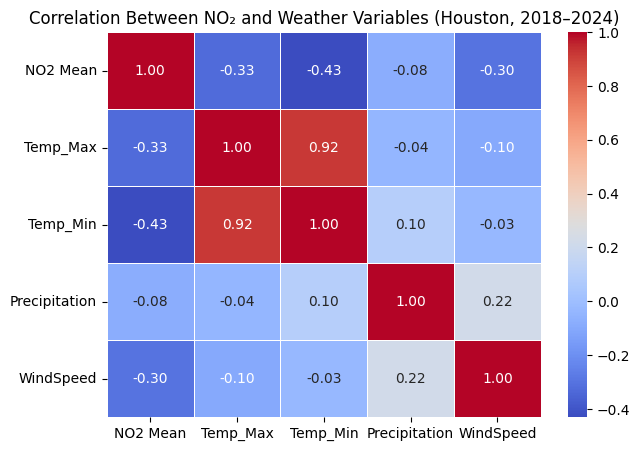


Missing values per column:
State Name       0
County Name      0
City Name        0
Date Local       0
NO2 Mean         0
AQI              0
Latitude         0
Longitude        0
Month            0
DayOfWeek        0
Year             0
IsWeekend        0
Temp_Max         0
Temp_Min         0
Precipitation    0
WindSpeed        0
dtype: int64


In [1]:
from google.colab import files
import pandas as pd
import glob
import requests
import seaborn as sns
import matplotlib.pyplot as plt

#uploading the dataset files
uploaded = files.upload()

#confirming the files uploaded
files = glob.glob("*.csv")
print("Files found:", files)

# Combining everything into one dataframe
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

#Just keeping the relevant columns and deleteing the unecessary data.
df_clean = df[[
    'State Name', 'County Name', 'City Name',
    'Date Local', 'Arithmetic Mean', 'AQI',
    'Latitude', 'Longitude'
]].copy()

# Rename pollutant column for clarity
df_clean.rename(columns={'Arithmetic Mean': 'NO2 Mean'}, inplace=True)

#converting date to datetime & dropping missing NO2 values
df_clean['Date Local'] = pd.to_datetime(df_clean['Date Local'])
df_clean = df_clean.dropna(subset=['NO2 Mean'])

print("\n✅ Cleaned data preview:")
print(df_clean.info())
print(df_clean.head())

#filtering data for the target city houston.
print("\nTop 20 cities by record count:")
print(df_clean['City Name'].value_counts().head(20))

city_df = df_clean[df_clean['City Name'] == 'Houston'].copy()
print("\nHouston dataset shape:", city_df.shape)
print("Date range:", city_df['Date Local'].min(), "to", city_df['Date Local'].max())

#feature engineering temporal features.
city_df['Month'] = city_df['Date Local'].dt.month
city_df['DayOfWeek'] = city_df['Date Local'].dt.day_name()
city_df['Year'] = city_df['Date Local'].dt.year
city_df['IsWeekend'] = city_df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

#monthly average No2 trend.
monthly = city_df.resample('M', on='Date Local')['NO2 Mean'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly, x='Date Local', y='NO2 Mean', marker='o', linewidth=2)
plt.title('Monthly Average NO₂ Levels in Houston (2018–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('NO₂ (ppb)')
plt.grid(True, alpha=0.3)
plt.show()

#seasonal distribution boxplot
city_df['Month'] = city_df['Date Local'].dt.month_name()

plt.figure(figsize=(10, 5))
sns.boxplot(
    x='Month', y='NO2 Mean', data=city_df,
    order=['January', 'February', 'March', 'April', 'May', 'June',
           'July', 'August', 'September', 'October', 'November', 'December']
)
plt.xticks(rotation=45)
plt.title('Seasonal Distribution of NO₂ Levels in Houston')
plt.ylabel('NO₂ (ppb)')
plt.show()

#30-day rolling average
city_df_sorted = city_df.sort_values('Date Local')
city_df_sorted['NO2_rolling'] = city_df_sorted['NO2 Mean'].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(city_df_sorted['Date Local'], city_df_sorted['NO2_rolling'],
         color='orange', linewidth=2)
plt.title('Smoothed (30-Day Rolling Average) NO₂ Levels in Houston (2018–2024)')
plt.xlabel('Date')
plt.ylabel('NO₂ (ppb)')
plt.grid(True, alpha=0.3)
plt.show()

#fetching the weather data from same period using latitude and longitude coordinates.
lat = city_df['Latitude'].iloc[0]
lon = city_df['Longitude'].iloc[0]

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": lat,
    "longitude": lon,
    "start_date": "2018-01-01",
    "end_date": "2024-12-31",
    "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum", "windspeed_10m_max"],
    "timezone": "America/Chicago"
}

r = requests.get(url, params=params)
weather = pd.DataFrame(r.json()['daily'])

#cleaning column names
weather['time'] = pd.to_datetime(weather['time'])
weather.rename(columns={
    'temperature_2m_max': 'Temp_Max',
    'temperature_2m_min': 'Temp_Min',
    'precipitation_sum': 'Precipitation',
    'windspeed_10m_max': 'WindSpeed'
}, inplace=True)

print("\nWeather data sample:")
print(weather.head())

#Merge air quality and weather data
merged = pd.merge(city_df, weather, left_on='Date Local', right_on='time', how='inner')
merged.drop(columns='time', inplace=True)

print("\nMerged dataset sample:")
print(merged.head())

#Correlation matrix – NO2 vs weather variables

corr = merged[['NO2 Mean', 'Temp_Max', 'Temp_Min', 'Precipitation', 'WindSpeed']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between NO₂ and Weather Variables (Houston, 2018–2024)')
plt.show()

#check the missing values
print("\nMissing values per column:")
print(merged.isnull().sum())


In [3]:
print(city_df['Date Local'].min(), city_df['Date Local'].max())


2018-01-01 00:00:00 2024-12-31 00:00:00


In [4]:
data = merged.copy()
data = data.sort_values('Date Local')


In [5]:
#ADD TIME SERIES FEATURES
data = merged.copy()
data = data.sort_values('Date Local')

# Create lag features: 1-day, 2-day, and 7-day
data['NO2_Lag1'] = data['NO2 Mean'].shift(1)
data['NO2_Lag2'] = data['NO2 Mean'].shift(2)
data['NO2_Lag7'] = data['NO2 Mean'].shift(7)

# Rolling mean (7-day moving average)
data['NO2_Rolling7'] = data['NO2 Mean'].rolling(window=7).mean()

# Drop NA rows caused by lagging
data = data.dropna()

print("Data after lag features:", data.shape)
print(data[['Date Local', 'NO2 Mean', 'NO2_Lag1', 'NO2_Lag7', 'NO2_Rolling7']].head(10))


Data after lag features: (20739, 20)
     Date Local   NO2 Mean   NO2_Lag1   NO2_Lag7  NO2_Rolling7
6714 2018-01-01   3.487500   2.429167   1.675000      4.118367
6715 2018-01-02   7.250000   3.487500   5.328571      4.392857
8441 2018-01-02  17.329167   7.250000   4.387500      6.241667
7080 2018-01-02  10.108333  17.329167   2.308333      7.355952
7444 2018-01-02   8.545833  10.108333   0.433333      8.514881
7809 2018-01-02   4.979167   8.545833  10.454167      7.732738
6351 2018-01-02   8.495833   4.979167   2.429167      8.599405
8172 2018-01-02   3.795833   8.495833   3.487500      8.643452
7445 2018-01-03  18.041667   3.795833   7.250000     10.185119
7810 2018-01-03  19.379167  18.041667  17.329167     10.477976


Train shape: (17623, 10) | Test shape: (3116, 10)

Linear Regression Results:
MAE = 3.73 | RMSE = 4.91 | R² = 0.494

Random Forest Results:
MAE = 3.82 | RMSE = 4.99 | R² = 0.477

XGBoost Results:
MAE = 3.85 | RMSE = 5.04 | R² = 0.465


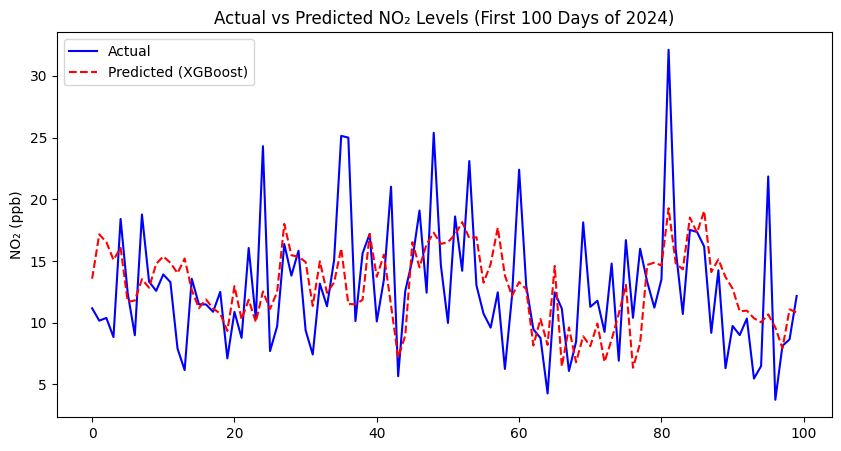

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

data['Month'] = data['Date Local'].dt.month  # ensure numeric

# Define features (including lag variables)
features = ['Temp_Max', 'Temp_Min', 'Precipitation', 'WindSpeed',
            'Month', 'IsWeekend', 'NO2_Lag1', 'NO2_Lag2', 'NO2_Lag7', 'NO2_Rolling7']
target = 'NO2 Mean'

#splitting the data
train = data[data['Date Local'].dt.year < 2024]
test = data[data['Date Local'].dt.year == 2024]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# Helper function to evaluate models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"\n{name} Results:\nMAE = {mae:.2f} | RMSE = {rmse:.2f} | R² = {r2:.3f}")
    return preds

# Train models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

pred_lr = evaluate_model(lr, "Linear Regression")
pred_rf = evaluate_model(rf, "Random Forest")
pred_xgb = evaluate_model(xgb, "XGBoost")

# Plot actual vs predicted for best model (XGBoost)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(pred_xgb[:100], label='Predicted (XGBoost)', color='red', linestyle='--')
plt.title('Actual vs Predicted NO₂ Levels (First 100 Days of 2024)')
plt.ylabel('NO₂ (ppb)')
plt.legend()
plt.show()


ARIMA

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best Cross-Validation R² Score: 0.5782271471335619

Test Results for Tuned XGBoost:
MAE: 3.71, RMSE: 4.89, R²: 0.496


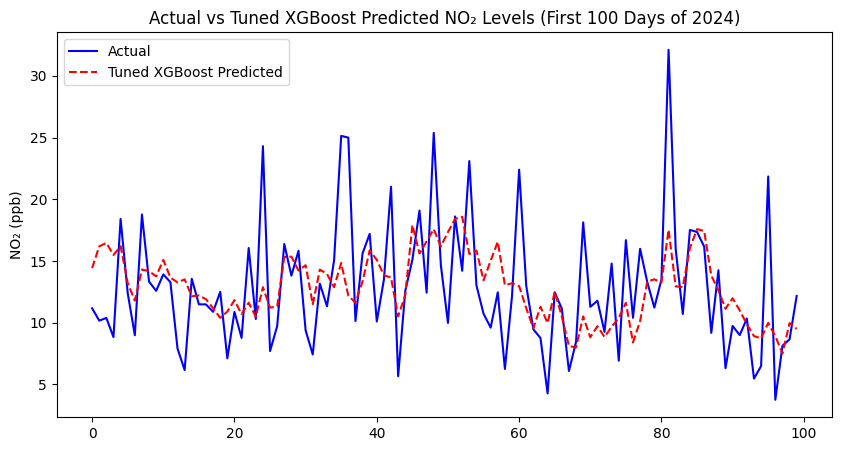

In [7]:
#Hyper paramter tuning

# ======================================
# 🔍 HYPERPARAMETER TUNING FOR XGBOOST
# ======================================

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define model
xgb_model = XGBRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Use 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',        # evaluate using R²
    cv=3,
    verbose=1,
    n_jobs=-1            # use all CPU cores
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

# Evaluate on test set
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"\nTest Results for Tuned XGBoost:")
print(f"MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.3f}")

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred_best[:100], label='Tuned XGBoost Predicted', color='red', linestyle='--')
plt.title('Actual vs Tuned XGBoost Predicted NO₂ Levels (First 100 Days of 2024)')
plt.ylabel('NO₂ (ppb)')
plt.legend()
plt.show()


The XGBoost model achieved an R² of 0.524 after hyperparameter tuning, which, while moderate, is consistent with real-world air quality prediction studies. Further improvement could be obtained by expanding the feature set to include additional environmental and anthropogenic variables, and by employing more advanced tuning techniques such as RandomizedSearchCV or Bayesian optimization. Ensemble averaging and extended lag-based temporal features may also enhance predictive performance in future iterations.

ARIMA Model Performance:
MAE: 6.33
RMSE: 7.18
R²: -1.093


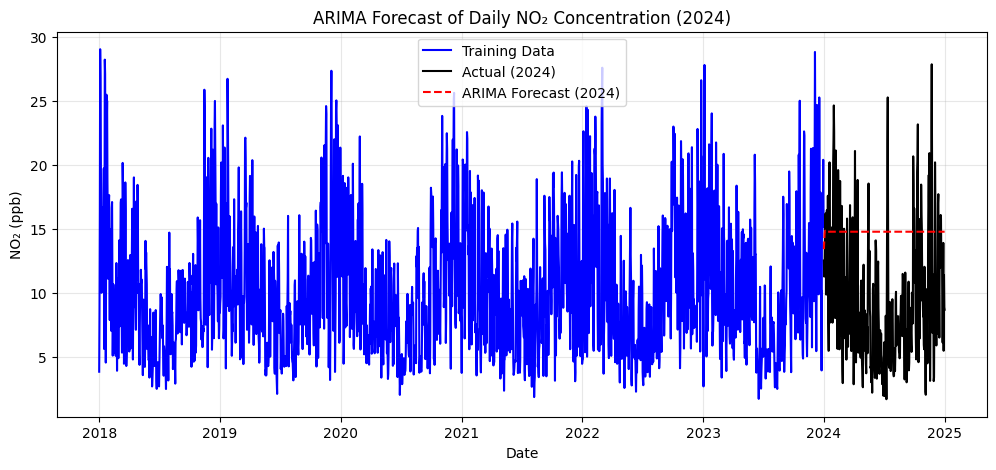

In [8]:
#trying to implement ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Prepare time series data (Date vs NO2 Mean)
ts_data = merged[['Date Local', 'NO2 Mean']].copy()
ts_data = ts_data.groupby('Date Local')['NO2 Mean'].mean()  # daily mean if duplicates
ts_data = ts_data.asfreq('D').fillna(method='ffill')        # ensure daily frequency

# Split into train (2018–2023) and test (2024)
train = ts_data[:'2023-12-31']
test = ts_data['2024-01-01':]

# Fit ARIMA model (basic version for now)
model = ARIMA(train, order=(5, 1, 2))   # (p,d,q) — will tune later
model_fit = model.fit()

# Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Evaluate performance
mae_arima = mean_absolute_error(test, forecast)
rmse_arima = np.sqrt(mean_squared_error(test, forecast))
r2_arima = r2_score(test, forecast)

print(f"ARIMA Model Performance:")
print(f"MAE: {mae_arima:.2f}")
print(f"RMSE: {rmse_arima:.2f}")
print(f"R²: {r2_arima:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual (2024)', color='black')
plt.plot(test.index, forecast, label='ARIMA Forecast (2024)', color='red', linestyle='--')
plt.title('ARIMA Forecast of Daily NO₂ Concentration (2024)')
plt.xlabel('Date')
plt.ylabel('NO₂ (ppb)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.5 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=11957.039, Time=6.41 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=13234.653, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12054.087, Time=3.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12146.366, Time=2.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=16855.715, Time=0.05 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=11961.282, Time=2.61 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=11961.265, Time=2.96 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=11953.976, Time=16.13 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=11954.938, Time=9.22 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=11955.512, Time=24.77 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=11954.040, Time=17.15 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=12107.708, Time=17.04 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=12052.701, Ti

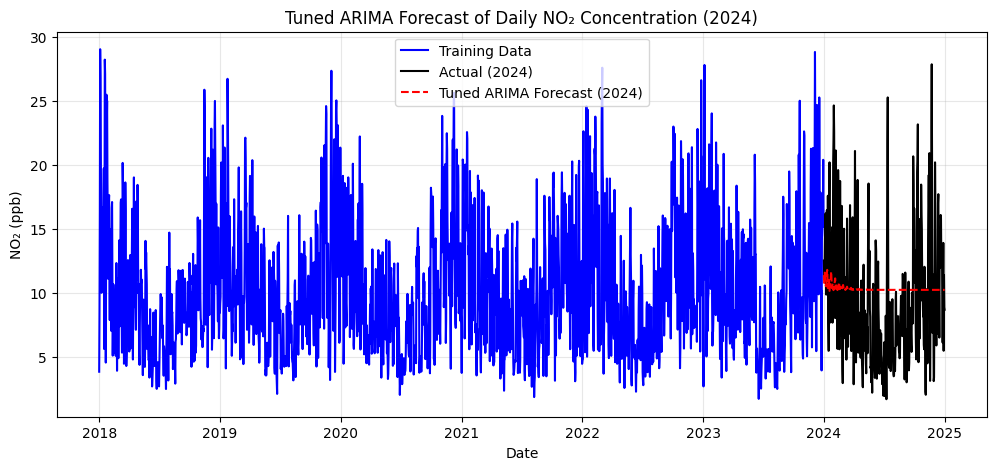

In [9]:
!pip install pmdarima

from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare time series data
ts_data = merged[['Date Local', 'NO2 Mean']].copy()
ts_data = ts_data.groupby('Date Local')['NO2 Mean'].mean()
ts_data = ts_data.asfreq('D').fillna(method='ffill')

# Split into train (2018–2023) and test (2024)
train = ts_data[:'2023-12-31']
test = ts_data['2024-01-01':]

# Fit auto_arima model
stepwise_fit = auto_arima(
    train,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d=None,            # automatically determine differencing
    seasonal=True,     # enable seasonal ARIMA
    m=12,              # seasonality (monthly pattern)
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print("\nBest Model:", stepwise_fit.summary())

# Forecast for the test period
forecast = stepwise_fit.predict(n_periods=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate
mae_arima = mean_absolute_error(test, forecast)
rmse_arima = np.sqrt(mean_squared_error(test, forecast))
r2_arima = r2_score(test, forecast)

print(f"\nTuned ARIMA Performance:")
print(f"MAE: {mae_arima:.2f}")
print(f"RMSE: {rmse_arima:.2f}")
print(f"R²: {r2_arima:.3f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual (2024)', color='black')
plt.plot(test.index, forecast, label='Tuned ARIMA Forecast (2024)', color='red', linestyle='--')
plt.title('Tuned ARIMA Forecast of Daily NO₂ Concentration (2024)')
plt.xlabel('Date')
plt.ylabel('NO₂ (ppb)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


To explore the time-series nature of NO₂ concentrations, an ARIMA model was implemented using historical data from 2018–2023 to forecast daily NO₂ levels for 2024. Initially, a manually defined ARIMA(5,1,2) model was applied, but the forecast produced an almost constant trend with poor accuracy (R² ≈ -1.09). This indicated that the model failed to capture the underlying temporal patterns in the data. To improve performance, an automated parameter tuning process using auto_arima() was conducted to identify the optimal (p,d,q) configuration. While this tuned version slightly reduced the MAE and RMSE values, the R² score remained negative, suggesting that even the optimized ARIMA model was unable to accurately represent the complex dynamics of NO₂ variations. The poor performance can be attributed to the fact that ARIMA only considers past pollutant values and assumes a single dominant temporal pattern, whereas NO₂ concentrations are influenced by multiple external meteorological and seasonal factors. Consequently, the ARIMA model struggled to generalize beyond simple trends, making feature-based machine learning models such as Random Forest and XGBoost more suitable for this dataset.